Mounted at /content/drive
Found 301 files belonging to 3 classes.

🔍 Evaluating ResNet50


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 66 variables whereas the saved optimizer has 130 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 461ms/step
Accuracy: 0.920265780730897
              precision    recall  f1-score   support

       early       0.93      0.93      0.93        91
    moderate       0.86      0.94      0.90       114
      severe       0.99      0.89      0.93        96

    accuracy                           0.92       301
   macro avg       0.93      0.92      0.92       301
weighted avg       0.92      0.92      0.92       301



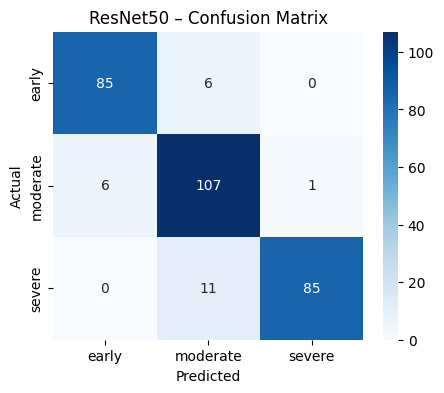


🔍 Evaluating MobileNetV3
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step
Accuracy: 0.8338870431893688
              precision    recall  f1-score   support

       early       0.89      0.78      0.83        91
    moderate       0.73      0.92      0.82       114
      severe       0.96      0.78      0.86        96

    accuracy                           0.83       301
   macro avg       0.86      0.83      0.84       301
weighted avg       0.85      0.83      0.84       301



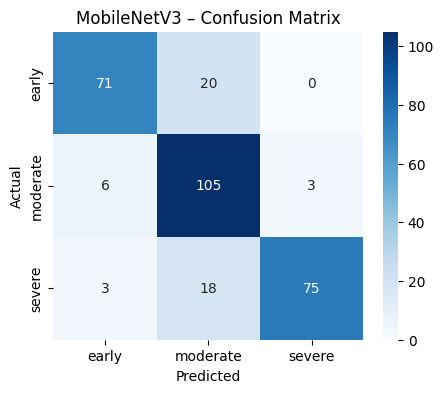


🔍 Evaluating EfficientNetB0
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
Accuracy: 0.8737541528239202
              precision    recall  f1-score   support

       early       0.93      0.81      0.87        91
    moderate       0.79      0.94      0.86       114
      severe       0.95      0.85      0.90        96

    accuracy                           0.87       301
   macro avg       0.89      0.87      0.88       301
weighted avg       0.88      0.87      0.87       301



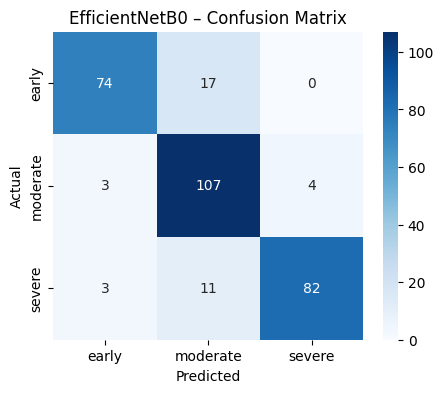


🔍 Evaluating ConvNeXtTiny


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 62 variables whereas the saved optimizer has 122 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 778ms/step
Accuracy: 0.8538205980066446
              precision    recall  f1-score   support

       early       0.86      0.84      0.85        91
    moderate       0.79      0.89      0.83       114
      severe       0.94      0.83      0.88        96

    accuracy                           0.85       301
   macro avg       0.86      0.85      0.86       301
weighted avg       0.86      0.85      0.85       301



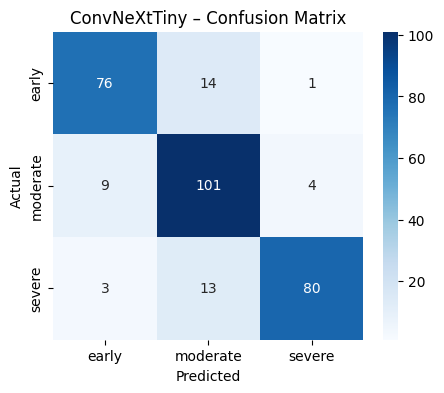

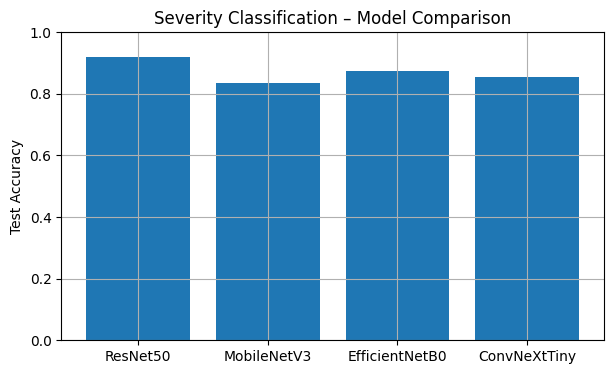

🏆 Best Model: ResNet50 with accuracy: 0.920265780730897


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# -------------------------------------------------
# Paths
# -------------------------------------------------
TEST_PATH = "/content/drive/MyDrive/BetelLeafDataset/SeverityDataset_test"
MODEL_ROOT = "/content/drive/MyDrive/SeverityModels"

models = {
    "ResNet50": f"{MODEL_ROOT}/resnet50/resnet50_final.keras",
    "MobileNetV3": f"{MODEL_ROOT}/mobilenetv3/mobilenetv3_final.keras",
    "EfficientNetB0": f"{MODEL_ROOT}/efficientnetb0/efficientnetb0_final.keras",
    "ConvNeXtTiny": f"{MODEL_ROOT}/convnext/convnext_final.keras"
}

IMG_SIZE = 224
BATCH_SIZE = 32

# -------------------------------------------------
# Load test dataset ONCE
# -------------------------------------------------
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_PATH,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    label_mode="int"
)

class_names = test_ds.class_names
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)

results = {}

# -------------------------------------------------
# Evaluate models
# -------------------------------------------------
for name, path in models.items():
    print(f"\n🔍 Evaluating {name}")
    model = tf.keras.models.load_model(path)

    y_pred = np.argmax(model.predict(test_ds), axis=1)
    acc = accuracy_score(y_true, y_pred)
    results[name] = acc

    print("Accuracy:", acc)
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f"{name} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# -------------------------------------------------
# Accuracy comparison chart
# -------------------------------------------------
plt.figure(figsize=(7,4))
plt.bar(results.keys(), results.values())
plt.ylabel("Test Accuracy")
plt.title("Severity Classification – Model Comparison")
plt.ylim(0,1)
plt.grid(True)
plt.show()

best_model = max(results, key=results.get)
print("🏆 Best Model:", best_model, "with accuracy:", results[best_model])
